<a href="https://colab.research.google.com/github/jcjimenezb123/ProgramacionPython/blob/master/Label_plot_with_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook is no longer working

[Plot Chemical space with d3js based library #RDKit ](https://iwatobipen.wordpress.com/2019/01/19/plot-chemical-space-with-d3js-based-library-rdkit-chemoinformatics/)

In [ ]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

In [ ]:
! python -m pip install "git+https://github.com/javadba/mpld3@display_fix"

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()

In [ ]:
def moltosvg(mol,molSize=(225,75),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

In [ ]:
smiles_list = ['CC','CCC','CCCC','O=C(C)Oc1ccccc1C(=O)O','c1ccccc1c1ccccc1']
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

data = range(len(mols))

svgs = [moltosvg(m) for m in mols]

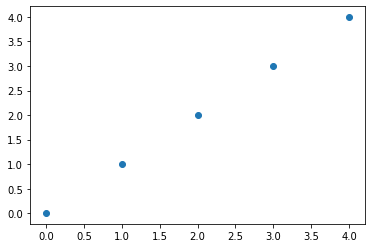

In [ ]:
fig, ax = plt.subplots()
points = ax.scatter(data, data)
tooltip = plugins.PointHTMLTooltip(points, svgs)
plugins.connect(fig, tooltip)